In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

In [7]:
# IMPORTING THE DATA

df = pd.read_csv("matches.csv")

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [37]:
# CKECKING THE SHAPE OF THE DATA

df.shape

(749, 17)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 754
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               749 non-null    int64         
 1   season           749 non-null    int64         
 2   city             749 non-null    object        
 3   date             0 non-null      datetime64[ns]
 4   team1            749 non-null    object        
 5   team2            749 non-null    object        
 6   toss_winner      749 non-null    object        
 7   toss_decision    749 non-null    object        
 8   result           749 non-null    object        
 9   dl_applied       749 non-null    int64         
 10  winner           749 non-null    object        
 11  win_by_runs      749 non-null    int64         
 12  win_by_wickets   749 non-null    int64         
 13  player_of_match  749 non-null    object        
 14  venue            749 non-null    object   

In [36]:
# CHECKING THE MISSING VALUES IN THE DATA

df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [28]:
df = df.drop(["umpire3"],axis = 1)

In [ ]:
# MISSING VALUE TREATMENT

In [30]:
# IMPUTING THE MISSING VALUES IN THE CITY COLUMN WITH THE MODE

mode_city = df["city"].mode()[0]

In [31]:
df["city"] = df["city"].fillna(mode_city)

In [35]:
# DROPPING THE REMAINING NULL VALUES IN THE DATA

df = df.dropna(axis = 0)

In [38]:
# CHANGING THE DATA TYPE OF DATE COLUMN FROM OBJECT TO DATETIME

df["date"] = pd.to_datetime(df['date'], format='%b %d, %Y',errors='coerce')

<AxesSubplot:>

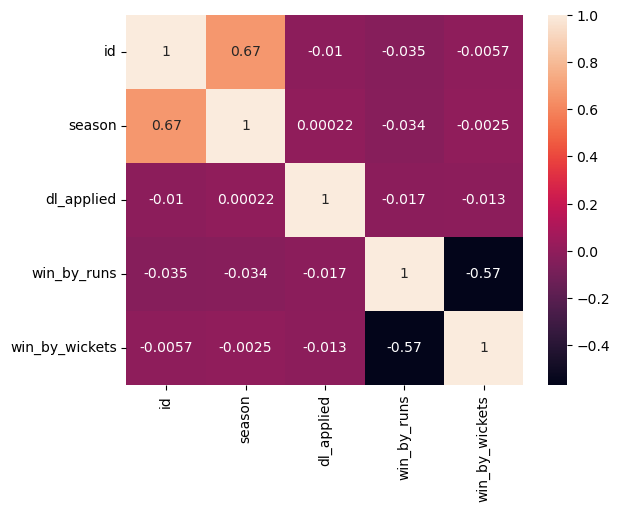

In [40]:
# CREATING A HEAT MAP TO SEE THE CORRELATION BETWEEN DIFFERENT FIELDS

sns.heatmap(df.corr(), annot = True)

In [8]:
# FINDING THE TOP 5 PLAYERS WHO WON THE PLAYER OF THE MATCH MOST NUMBER OF TIMES

pom = df["player_of_match"].value_counts()[:5]

In [42]:
pom

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [9]:
fig = px.bar(pom,x = pom.index, y = pom.values, color = pom.values)

fig.update_xaxes(title_text='Player Name')
fig.update_yaxes(title_text='Count')

In [82]:
# TOTAL NUMBER OF MATCHES WON BY EACH TEAM

total_matches = df["winner"].value_counts()

In [83]:
total_matches

Mumbai Indians                 108
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

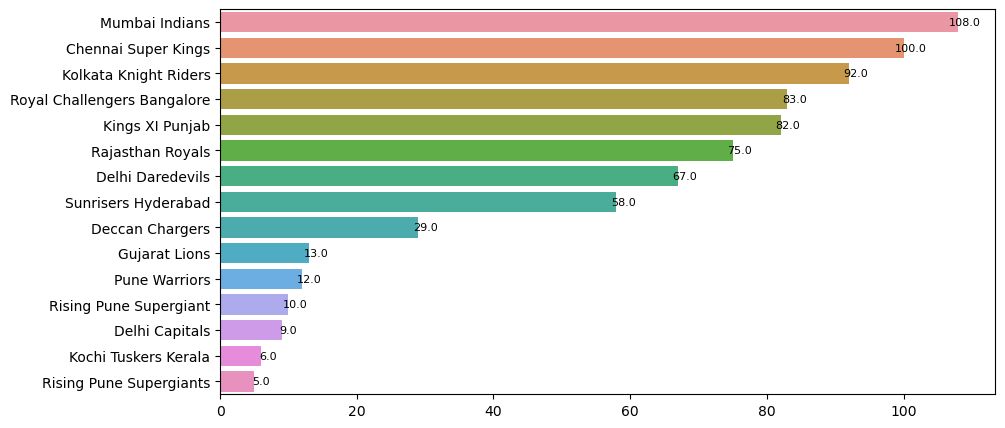

In [103]:
plt.figure(figsize=(10,5))

ax=sns.barplot(y = total_matches.index, x = total_matches.values)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=8, color='black',
                xytext=(5, 0), textcoords='offset points')



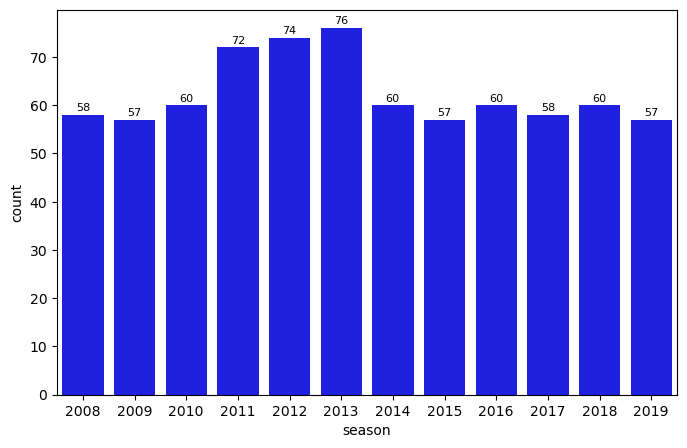

In [218]:
# PLOTTING THE MATCHES PLAYED IN EACH SEASON
plt.figure(figsize=(8,5))
ax = sns.countplot(x = "season", data = df, color = "blue")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.show()

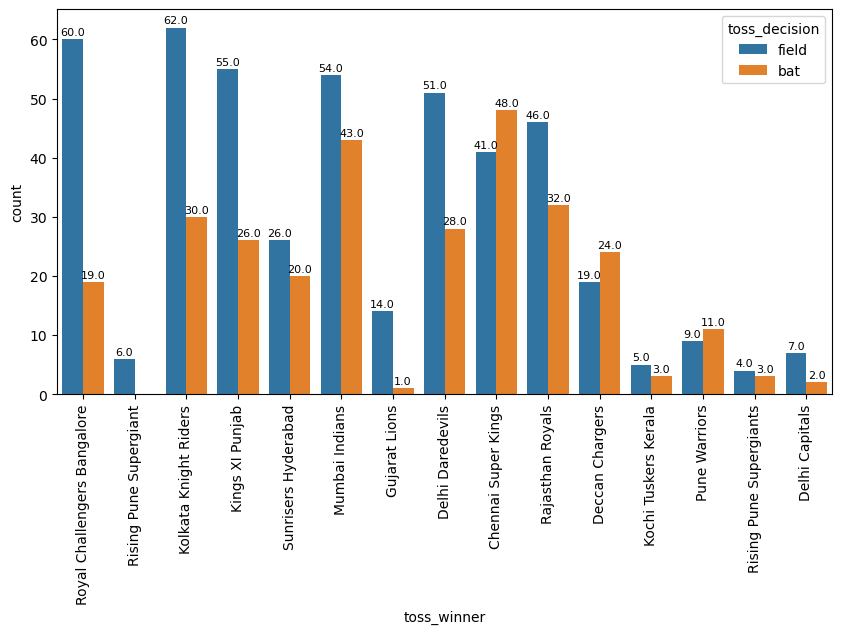

In [113]:
# CHECKING EACH TEAMS PREFERENCE AFTER WINNING A MATCH

plt.figure(figsize=(10,5))

ax=sns.countplot(x = "toss_winner", data = df, hue = "toss_decision")
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [114]:
# MOST PRFFERED CHOISE OF TEAMS AFTER WINNING THE TOSS

toss_count = df["toss_decision"].value_counts()

In [115]:
toss_count

field    459
bat      290
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x16c0b01cfd0>,
 [Text(-0.38175668949755404, 1.0316306655115814, 'field'),
  Text(0.4164619484572209, -1.1254152324752031, 'bat')],
 [Text(-0.20823092154412035, 0.5627076357335897, '61.28%'),
  Text(0.24293613660004548, -0.6564922189438684, '38.72%')])

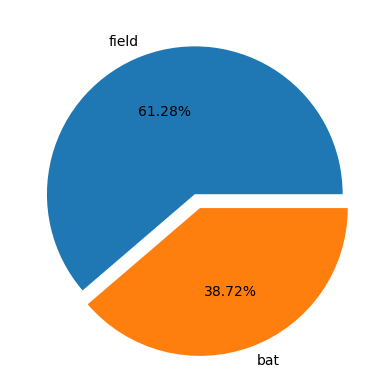

In [133]:
plt.pie(toss_count,labels = toss_count.index, autopct="%.2f%%",explode = [0,0.1])

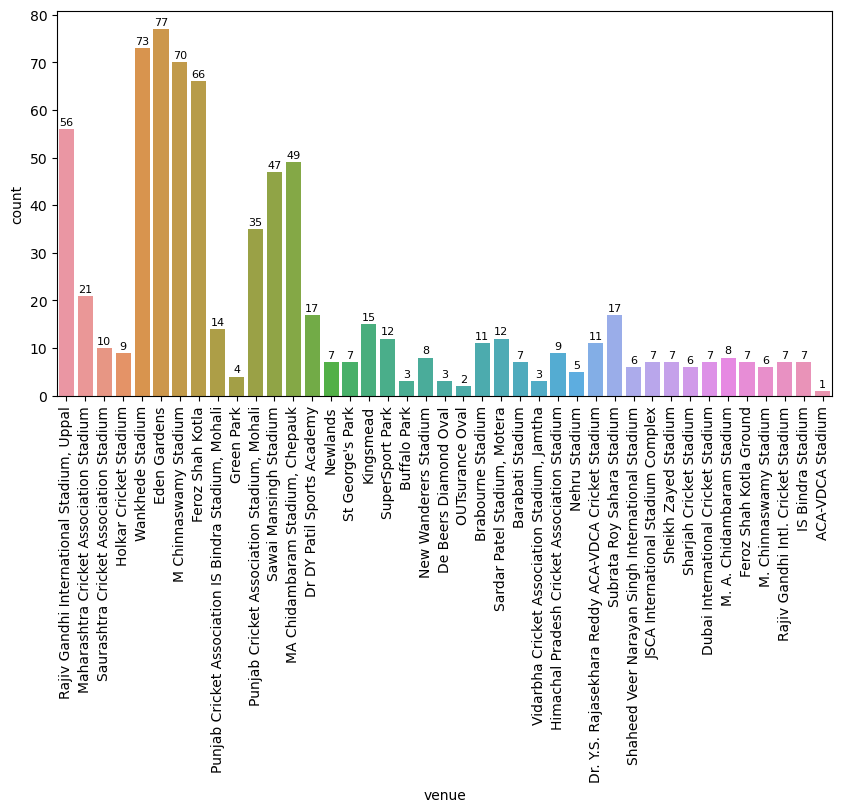

In [124]:
# VENUE WHICH HOSTED THE MAXIMUM NUMBER OF MATCHES
plt.figure(figsize=(10,5))
ax=sns.countplot(x = "venue", data = df)
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.show()


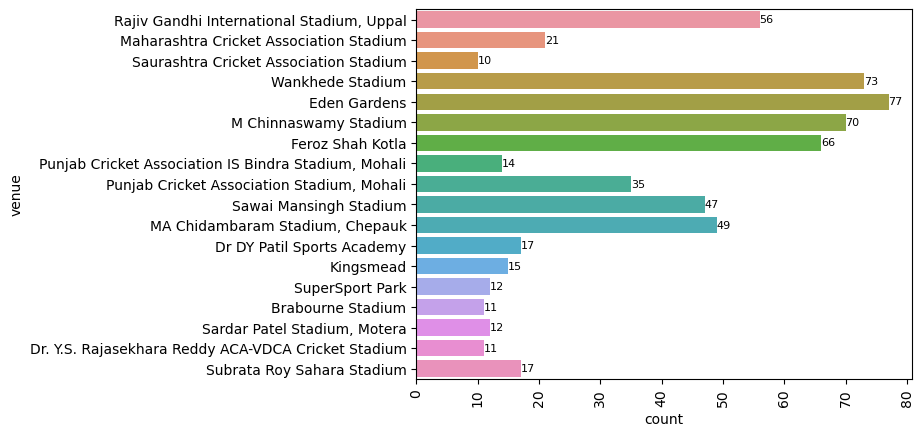

In [226]:
# VENUES WHERE ATLEAST 10 MATCHES WHERE HELD

venue_counts = df['venue'].value_counts()

valid_venues = venue_counts[venue_counts >= 10].index

filtered_df = df[df['venue'].isin(valid_venues)]

ax=sns.countplot(y="venue", data=filtered_df)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=8, color='black',
                xytext=(5, 0), textcoords='offset points')
plt.show()


In [129]:
# PREFERENCE OF TEAMS AFTER WINNING THE TOSS IN EDEN GARDENS

eden = df[df["venue"] == "Eden Gardens"]

eden_count = eden["toss_decision"].value_counts()

In [130]:
eden_count

field    49
bat      28
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x16c0b3c9e20>,
 [Text(-0.45695648023571717, 1.000595210447554, 'field'),
  Text(0.4984979784389643, -1.0915584113973316, 'bat')],
 [Text(-0.24924898921948208, 0.5457792056986657, '63.64%'),
  Text(0.29079048742272917, -0.6367424066484433, '36.36%')])

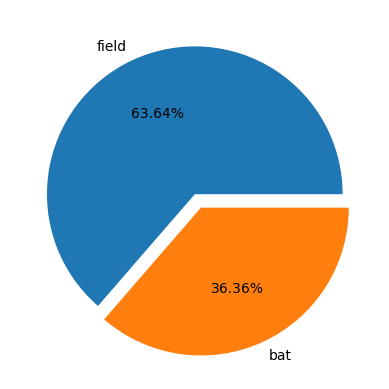

In [132]:
plt.pie(eden_count, labels = eden_count.index, autopct="%.2f%%", explode = [0,0.1])

In [10]:
# FINDING THE TOTAL NUMBER OF MATCHES PLAYED BY EACH TEAM

total = (df["team1"].value_counts() + df["team2"].value_counts()).sort_values(ascending = False)

In [11]:
total

Mumbai Indians                 186
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            163
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [12]:
ax = total.iplot(kind = "bar")

In [139]:
# TEAMS THAT WON BY 5 WICKETS OR HIGHER MAXIMUM NUMBER OF TIMES

five_wickets = df[df["win_by_wickets"]>=5]

In [152]:
five_wickets.head()

five_wickets["winner"].value_counts()

Kolkata Knight Riders          47
Mumbai Indians                 41
Royal Challengers Bangalore    40
Chennai Super Kings            39
Kings XI Punjab                37
Delhi Daredevils               37
Rajasthan Royals               34
Sunrisers Hyderabad            24
Deccan Chargers                11
Gujarat Lions                   9
Pune Warriors                   5
Rising Pune Supergiant          4
Kochi Tuskers Kerala            4
Delhi Capitals                  4
Rising Pune Supergiants         2
Name: winner, dtype: int64

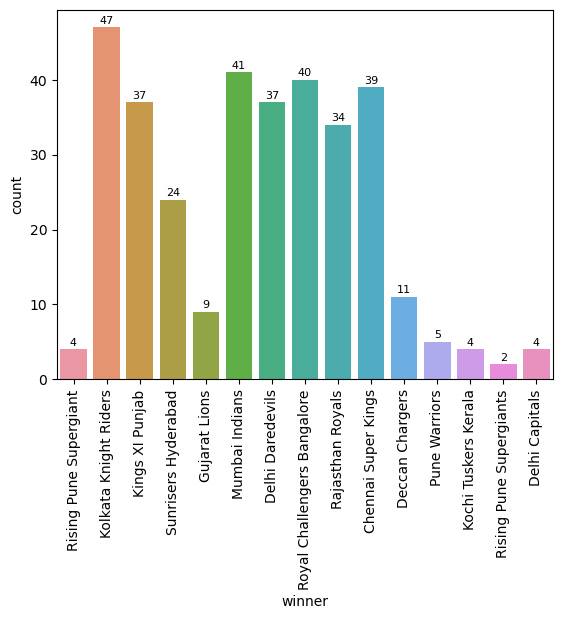

In [153]:
ax = sns.countplot(x = five_wickets["winner"], data = five_wickets)
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [148]:
# TEAMS THAT WON BY 50 RUNS OR MORE MAXIMUM NUMBER OF TIMES

runs = df[df["win_by_runs"]>=50]

In [150]:
runs.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
8,9,2017,Pune,NaT,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
14,15,2017,Delhi,NaT,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
26,27,2017,Kolkata,NaT,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan
32,33,2017,Pune,NaT,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus
43,44,2017,Delhi,NaT,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


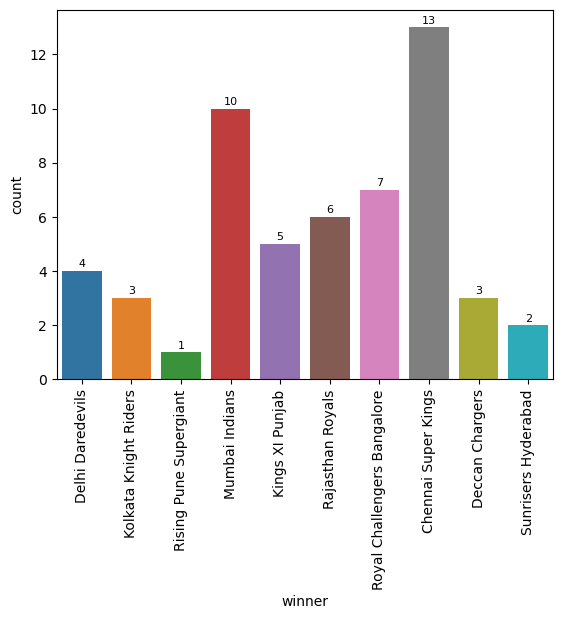

In [156]:
ax=sns.countplot(x = runs["winner"], data = runs)
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [159]:
# TOP TEN OFFICILAS FOR THE MOST NUMBER OF MATCHES 

umpire = (df["umpire1"].value_counts() + df["umpire2"].value_counts()).sort_values(ascending = False)[:10]

In [160]:
umpire

S Ravi             106.0
HDPK Dharmasena     86.0
C Shamshuddin       73.0
AK Chaudhary        58.0
SJA Taufel          55.0
M Erasmus           54.0
BR Doctrove         42.0
CK Nandan           41.0
Nitin Menon         41.0
RE Koertzen         41.0
dtype: float64

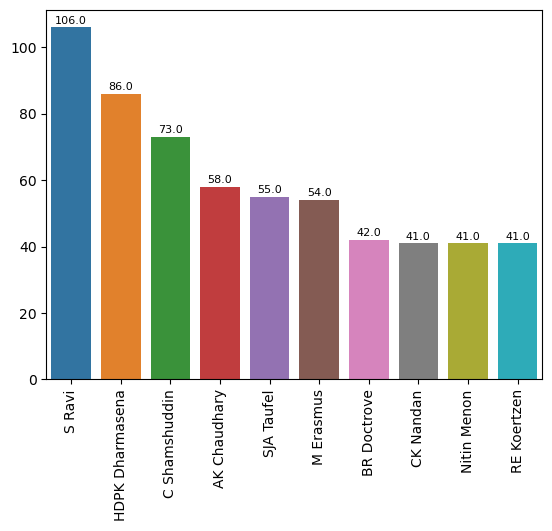

In [166]:
ax = sns.barplot(x = umpire.index,y = umpire.values)
plt.xticks(rotation = 90)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

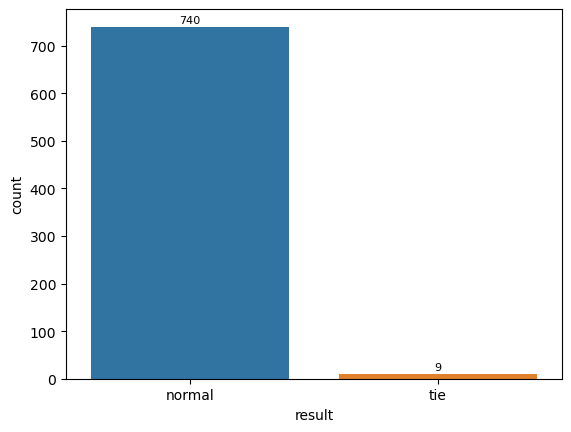

In [172]:
# NOEMAL RESULTS VS TIE
ax=sns.countplot(x = df["result"], data = df)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

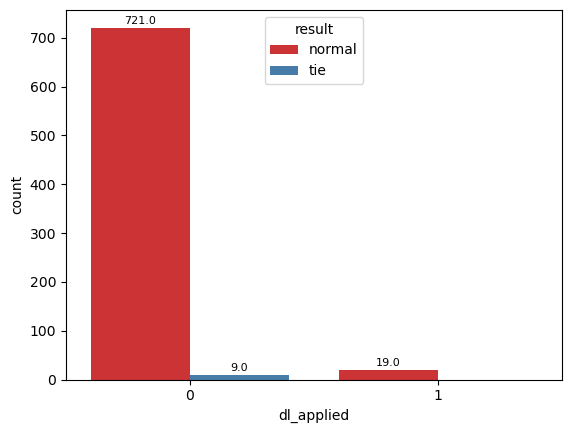

In [182]:
# COMPARING THE MATCHES IN WHICH DL WAS APPLIED WITH THE RESULT OF THOSE MATCHES

ax = sns.countplot(x = df["dl_applied"], data = df, hue = df["result"], palette = "Set1")


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [183]:
# COMPARING OF THE WINS ARE BY MORE THAN 50 RUNS

def run(i):
    if i > 50:
        return "Good Win"
    else:
        return "Average win"

In [184]:
df["run_win"] = df["win_by_runs"].apply(run)

In [186]:
df.head(50)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,run_win
0,1,2017,Hyderabad,NaT,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Average win
1,2,2017,Pune,NaT,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Average win
2,3,2017,Rajkot,NaT,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Average win
3,4,2017,Indore,NaT,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Average win
5,6,2017,Hyderabad,NaT,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Average win
6,7,2017,Mumbai,NaT,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,Average win
7,8,2017,Indore,NaT,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Average win
8,9,2017,Pune,NaT,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,Good Win
9,10,2017,Mumbai,NaT,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,Average win
10,11,2017,Kolkata,NaT,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,Average win


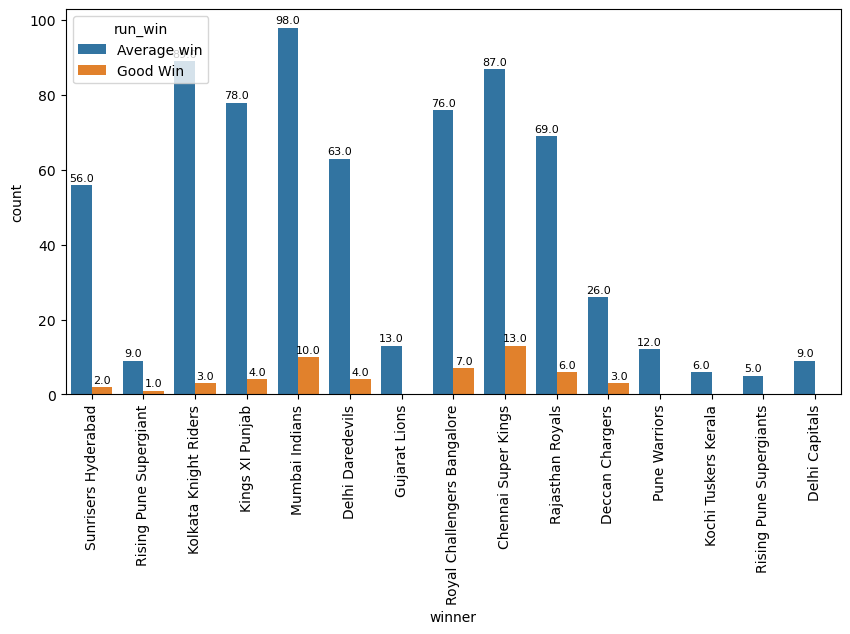

In [191]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x = df["winner"], data = df, hue = df["run_win"])
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [192]:
def wicket(i):
    if i > 5:
        return "More than 5"
    else:
        return "Less tha 5"

In [193]:
df["wicket win"] = df["win_by_wickets"].apply(wicket)

In [194]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,run_win,wicket win
0,1,2017,Hyderabad,NaT,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Average win,Less tha 5
1,2,2017,Pune,NaT,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Average win,More than 5
2,3,2017,Rajkot,NaT,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Average win,More than 5
3,4,2017,Indore,NaT,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Average win,More than 5
5,6,2017,Hyderabad,NaT,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Average win,More than 5


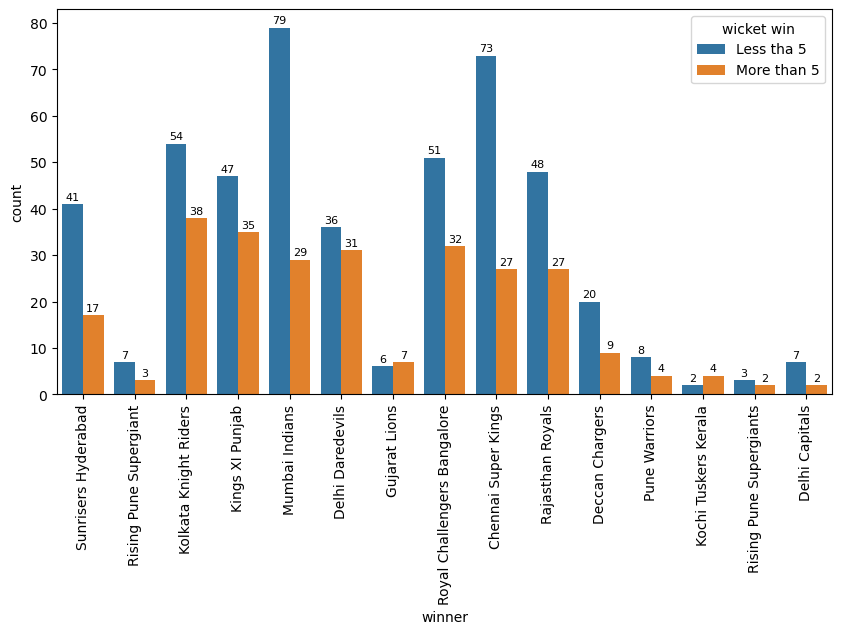

In [197]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x = df["winner"], data = df, hue = df["wicket win"])
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [206]:
# DETAILS OF THE MATCH WHERE THE TEAM WON BY MOST NUMBER OF RUNS AND MOST NUMBER OF WICKETS

In [207]:
bowl_first_win = df[df["win_by_wickets"]>=1]

In [208]:
bowl_first_win

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,run_win,wicket win
1,2,2017,Pune,NaT,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Average win,More than 5
2,3,2017,Rajkot,NaT,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Average win,More than 5
3,4,2017,Indore,NaT,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Average win,More than 5
5,6,2017,Hyderabad,NaT,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Average win,More than 5
6,7,2017,Mumbai,NaT,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,Average win,Less tha 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11345,2019,Bengaluru,NaT,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Average win,Less tha 5
750,11346,2019,Mohali,NaT,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Average win,More than 5
751,11347,2019,Mumbai,NaT,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,Average win,More than 5
752,11412,2019,Chennai,NaT,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Average win,More than 5


In [209]:
bat_first_wins = df[df["win_by_runs"]>0]

In [210]:
bat_first_wins

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,run_win,wicket win
0,1,2017,Hyderabad,NaT,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Average win,Less tha 5
8,9,2017,Pune,NaT,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,Good Win,Less tha 5
13,14,2017,Kolkata,NaT,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,Average win,Less tha 5
14,15,2017,Delhi,NaT,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,Good Win,Less tha 5
16,17,2017,Bangalore,NaT,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,Average win,Less tha 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,11335,2019,Chennai,NaT,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary,Average win,Less tha 5
741,11337,2019,Delhi,NaT,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,Average win,Less tha 5
742,11338,2019,Kolkata,NaT,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Average win,Less tha 5
743,11339,2019,Hyderabad,NaT,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Average win,Less tha 5


In [212]:
# MAX WICKETS

df.loc[bowl_first_win["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                                  NaT
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
run_win       

In [213]:
# MIN WICKETS

df.loc[bowl_first_win["win_by_wickets"].idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                                 NaT
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
run_win                      Average win
wicket win                    Less tha 5
Name: 559, dtype: object

In [214]:
#MAX RUNS

df.loc[bat_first_wins["win_by_runs"].idxmax()]

id                               44
season                         2017
city                          Delhi
date                            NaT
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
run_win                    Good Win
wicket win               Less tha 5
Name: 43, dtype: object

In [216]:
# MIN RUNS

df.loc[bat_first_wins["win_by_runs"].idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                                     NaT
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 